# Heat conduction in a wall

In [10]:
import numpy as np
import matplotlib.pylab as plt

In [11]:
%matplotlib inline

In [12]:
from materials import *
from scipy.integrate import odeint

In [20]:
print(materials.keys())

dict_keys(['clay', 'PSE', 'concrete', 'wood_wool'])


In [116]:
w_day = 2*np.pi / (24 * 60 * 60)
w_year = 2*np.pi / (24 * 60 * 60 * 365)

In [239]:
kappa = materials['clay']['kappa']
w = 2*np.pi/( 24 * 60 * 60 )  # s-1, pulse
T0_ext = 10  # K, amplitude
L = .5   # m, wall thickness

In [240]:
# Solve
N = 201  # number of mesh points

X = np.linspace( 0, L, N )  # mesh

dx = L/(N-1)
T = np.zeros_like( X )

Tzero = np.zeros_like( X )
#Tzero = 1+Tzero

In [241]:
penetration_depth = np.sqrt( 2*kappa/w_day )
print(penetration_depth)

0.1660969212581626


In [242]:
def T_ext(t):
    return T0_ext * np.sin(w*t)

def dTdt_ext(t):
    return -T0_ext * w * np.cos(w*t)

In [246]:
def flux_in( T, t ):
    """ Flux entrant
        T: Température de surface, °C
        t: temps, sec
    """
    w = 2*np.pi/( 60*60*24 )
    F = 10*( 12*np.cos( w*t ) - T )
    return F

def Laplacien(U, dx):
    """ Calcul le laplacien du vecteur U
        avec des conditions aux limites adiabatiques 
    """
    d2Udx2 = np.zeros_like( U )
    
    U_i = U[1:-1]
    U_im1 = U[0:-2]  # i minus one
    U_ip1 = U[2:]    # i plus one

    d2Udx2[1:-1] = ( U_ip1 + U_im1 -2*U_i )/dx**2
    
    # Boundary conditions:
    # d2Udx2[0] = -(U[0]-U[1])/dx
    #d2Udx2[-1] = (U[-2] - U[-1])/dx
    
    return d2Udx2



def dTdt( T, t ):
    dTdt = np.zeros_like( T )
    
    dTdt = kappa*Laplacien(T, dx)

    # boundary conditions:
    dTdt[0] += dTdt_ext(t)
    dTdt[-1] += dTdt[-2]
    
    return dTdt

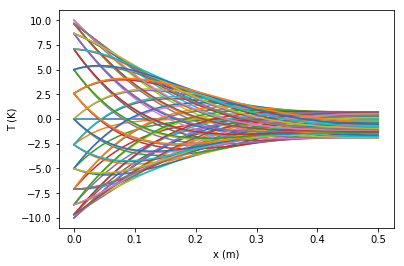

In [247]:
day_seconds =  3600 * 24 # s
t_span = np.arange(0, day_seconds*3, 3600)

results = odeint(dTdt, Tzero, t_span)

plt.plot( X, results.T ); plt.xlabel('x (m)');
plt.ylabel('T (K)');

In [252]:
t_span_hour = t_span / 3600

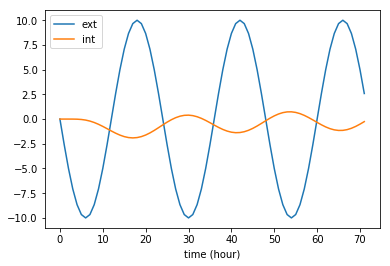

In [253]:
plt.plot(t_span_hour, results.T[0, :], label='ext')
plt.plot(t_span_hour, results.T[-1, :], label='int')
plt.xlabel('time (hour)'); plt.legend();

$$
v(x, t) = V_0 \, exp\left( -x \sqrt{\frac{w}{2 \kappa}} \right) \, sin\left( wt - x \sqrt{\frac{w}{2 \kappa}} \right)
$$

In [249]:
def T_soil_theo(x, t, w, kappa):
    coeff = np.sqrt( w/2/kappa )
    return - np.exp( -x*coeff ) * np.sin( w*t - x*coeff )

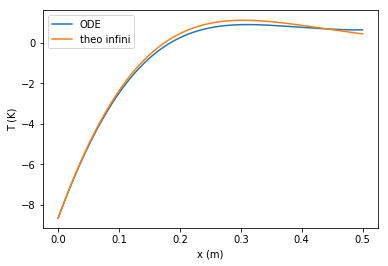

In [254]:
time_idx = -20
plt.plot( X, results[time_idx, :], label='ODE');
plt.plot( X, T0_ext*T_soil_theo(X, t_span[time_idx], w, kappa), label='theo infini');

plt.xlabel('x (m)');
plt.ylabel('T (K)');
plt.legend();